## 1. Data Wrangling with Python: Activity 9, page 294

#### Step 1: Import the necessary libraries, including regex and beautifulsoup:

In [1]:
import urllib.request, urllib.parse, urllib.error

import requests

from bs4 import BeautifulSoup

import ssl

import re

#### Step 2: Check the SSL certificate:

In [2]:
ctx = ssl.create_default_context()

ctx.check_hostname = False

ctx.verify_mode = ssl.CERT_NONE

#### Step 3: Read the HTML from the URL:

In [3]:
# Read the HTML from the URL and pass on to BeautifulSoup

top100url = 'https://www.gutenberg.org/browse/scores/top'

response = requests.get(top100url)

#### Step 4: Write a small function to check the status of the web request.

In [4]:
def status_check(r):

    if r.status_code==200:

        print('Success!')

        return 1

    else:

        print('Failed!')

        return -1

In [5]:
status_check(response)

Success!


1

#### Step 5: Decode the response and pass this on to BeautifulSoup for HTML parsing.

In [6]:
contents = response.content.decode(response.encoding)

soup = BeautifulSoup(contents, 'html.parser')

#### Step 6: Find all the href tags and store them in the list of links. Check what the list looks like – print the first 30 elements.

In [7]:
# Empty list to hold all the http links in the HTML page

lst_links=[]

# Find all the href tags and store them in the list of links

for link in soup.find_all('a'):
#print(link.get('href'))
    lst_links.append(link.get('href'))

#### Step 7: Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks.

In [8]:
lst_links[:100]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7',
 '#authors-last7',
 '#books-last30',
 '#authors-last30',
 '/ebooks/1342',
 '/ebooks/11',
 '/ebooks/1661',
 '/ebooks/14568',
 '/ebooks/84',
 '/ebooks/65952',
 '/ebooks/2701',
 '/ebooks/98',
 '/ebooks/174',
 '/ebooks/33283',
 '/ebooks/345',
 '/ebooks/74',
 '/ebooks/2600',
 '/ebooks/1232',
 '/ebooks/46',
 '/ebooks/64317',
 '/ebooks/1260',
 '/ebooks

#### Step 8: Initialize the empty list to hold the file numbers over an appropriate range and use regex to find the numeric digits in the link href string. Use the findall method.

In [9]:
booknum=[]

In [10]:
for i in range(19,119):
    link=lst_links[i]
    link=link.strip()

    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))

In [11]:
print ('\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n'+'-'*70)

print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 1342, 11, 1661, 14568, 84, 65952, 2701, 98, 174, 33283, 345, 74, 2600, 1232, 46, 64317, 1260, 2554, 65950, 76, 2591, 4300, 58585, 5200, 43, 1400, 55, 1497, 2542, 6130, 26184, 27827, 205, 1184, 1952, 65956, 63256, 45, 844, 30254, 1292, 16, 65953, 5740, 219, 6133, 768, 514, 996, 730, 1080, 5739, 902, 158, 244, 42108, 65945, 36, 135, 65959, 120, 65944, 2814, 28054, 103, 203, 19033, 236, 65943, 4363, 16328, 1727, 766, 25344, 65957, 1399, 2852, 863, 829, 4980, 1998, 215, 408, 2680, 623, 8800]


#### Step 9:What does the soup object's text look like? Use the .text method and print only the first 2,000 characters (do not print the whole thing, as it is too long).

In [12]:
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2021-07-30126413
last 7 days908192
last 30 days3992742



Top 100 EBooks yesterda

#### Step 10: Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday's ranking).

In [13]:
# Temp empty list of Ebook names
lst_titles_temp=[]

#### Step 11: Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use the splitlines method of soup.text. It splits the lines of text of the soup object.

In [14]:
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

#### Step 12: Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use the splitlines method.

In [15]:
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

#### Step 13: Use a regular expression to extract only text from the name strings and append it to an empty list. Use match and span to find the indices and use them.

In [16]:
lst_titles=[]

for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

In [17]:
for l in lst_titles:
    print(l)

Top 
Top 
Top 
Top 


Top 

Pride and Prejudice by Jane Austen 
Alice
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Sir Gawayne and the Green Knight 
Frankenstein
Writing Class by Robert Sheckley 
Moby Dick
A Tale of Two Cities by Charles Dickens 
The Picture of Dorian Gray by Oscar Wilde 
Calculus Made Easy by Silvanus P
Dracula by Bram Stoker 
The Adventures of Tom Sawyer
War and Peace by graf Leo Tolstoy 
The Prince by Niccol
A Christmas Carol in Prose
The Great Gatsby by F
Jane Eyre
Crime and Punishment by Fyodor Dostoyevsky 
Deirdre by James Stephens 
Adventures of Huckleberry Finn by Mark Twain 
Grimms
Ulysses by James Joyce 
The Prophet by Kahlil Gibran 
Metamorphosis by Franz Kafka 
The Strange Case of Dr
Great Expectations by Charles Dickens 
The Wonderful Wizard of Oz by L
The Republic by Plato 
A Doll
The Iliad by Homer 
Simple Sabotage Field Manual by United States
The Kama Sutra of Vatsyayana by Vatsyayana 
Walden
The Count of Monte Cristo
The Yellow Wallpaper b

## 2. Data Wrangling with Python: Activity 10, page 295

#### Step 1: Import urllib.request, urllib.parse, urllib.error, and json.

In [18]:
import urllib.request, urllib.parse, urllib.error

import json

#### Step 2: Load the secret API key (you have to get one from the OMDb website and use that; it has a daily limit of 1,000) from a JSON file stored in the same folder in a variable, by using json.loads.

Obtained the key

#### Step 3: Obtain a key and store it in JSON as APIkeys.json.

Saved the json response into APIKeys.json

#### Step 4: Open the APIkeys.json file.

In [19]:
with open('APIkeys.json') as f:

    keys = json.load(f)

omdbapi = keys['OMDBapi']

#### Step 5: Assign the OMDb portal (http://www.omdbapi.com/?) as a string to a variable.

In [20]:
serviceurl = 'http://www.omdbapi.com/?'

#### Step 6: Create a variable called apikey with the last portion of the URL (&apikey=secretapikey), where secretapikey is your own API key.

In [21]:
apikey = '&apikey='+omdbapi

#### Step 7: Write a utility function called print_json to print the movie data from a JSON file (which we will get from the portal).

In [22]:
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer',
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings',
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print('-'*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f'{k}: {json_data[k]}')
            print('-'*50)

#### Step 8: Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. Use the os module. The poster data is stored in the JSON key Poster. Use the Python command to open a file and write the poster data. Close the file after you're done. This function will save the poster data as an image file.

In [23]:
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
        filename=savelocation+str(title)+'.'+poster_file_extension
        f=open(filename,'wb')
        f.write(poster_data)
        f.close()

#### Step 9: Write a utility function called search_movie to search for a movie by its name, print the downloaded JSON data, and save the movie poster in the local folder. Use a try-except loop for this. Use the previously created serviceurl and apikey variables. You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the urllib.parse.urlencode() function and then add the serviceurl and apikey to the output of the function to construct the full URL. This URL will be used to access the data. The JSON data has a key called Response. If it is True, that means the read was successful. Check this before processing the data. If it's not successful, then print the JSON key Error, which will contain the appropriate error message returned by the movie database.

In [24]:
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of {title} now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
        if json_data['Response']=='True' and json_data['Poster']!='N/A':
            save_poster(json_data)
        else:
            print('Error encountered: ',json_data['Error'])
    except urllib.error.URLError as e:
        print(f'ERROR: {e.reason}')

#### Step 10: Test the search_movie function by entering Titanic.

In [25]:
search_movie('Titanic')

Retrieving the data of Titanic now... 
http://www.omdbapi.com/?t=Titanic&apikey=f7ccdee
--------------------------------------------------
Title: Titanic
--------------------------------------------------
Year: 1997
--------------------------------------------------
Rated: PG-13
--------------------------------------------------
Released: 19 Dec 1997
--------------------------------------------------
Runtime: 194 min
--------------------------------------------------
Genre: Drama, Romance
--------------------------------------------------
Director: James Cameron
--------------------------------------------------
Writer: James Cameron
--------------------------------------------------
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
--------------------------------------------------
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
--------------------------------------------------
Language: English, Swedis

#### Step 11: Test the search_movie function by entering 'Random_error' (obviously, this will not be found, and you should be able to check whether your error catching code is working properly).

In [26]:
search_movie('Random_error')

Retrieving the data of Random_error now... 
http://www.omdbapi.com/?t=Random_error&apikey=f7ccdee
Error encountered:  Movie not found!


## 3. Connect to the Twitter API and do a simple data pull

#### a.  Using either the instructions from the book on connecting to an API or for help look here – pull back data searching for “Bellevue University” and “Data Science” (or something else you are interested in)

In [30]:
import twitter
api = twitter.Api(consumer_key='YNFWBg8QykXbZnUzURmhOzImp',
                  consumer_secret='86jACFCXxrLpeDwSPYG1lyAFsX7VSHaKNIaSiiA02zSDjvomvK',
                  access_token_key="931926277-TEMs935w0EZUGa6D6C38Sfhu734b0dQZPD7b3Kyv",
                  access_token_secret="ByHg6ktWx8J1mwqEDr9kjEBqDC7sfoScV1fMAgwhaAaYS")

In [31]:
print(api.VerifyCredentials())

{"created_at": "Wed Nov 07 12:16:22 +0000 2012", "default_profile": true, "favourites_count": 1, "followers_count": 1, "friends_count": 83, "geo_enabled": true, "id": 931926277, "id_str": "931926277", "location": "Austin, TX", "name": "Vasanthakumar kalaikkovan", "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_image_url": "http://pbs.twimg.com/profile_images/1356049384602001411/GzpIbgmB_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1356049384602001411/GzpIbgmB_normal.jpg", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "vasanthkalai007", "withheld_in_countries": []}


In [32]:
api.GetSearch(term='datascience', since=2021-1-1, count=10)

[Status(ID=1420958491397734401, ScreenName=KirkDBorne, Created=Fri Jul 30 04:04:39 +0000 2021, Text='This handy 6-page laminated guide is a concise desktop reference to key concepts behind #Python logic, syntax, and… https://t.co/Yc2bSjaTRJ'),
 Status(ID=1421116581384376320, ScreenName=NIH, Created=Fri Jul 30 14:32:50 +0000 2021, Text='#NIH’s 2021-2025 Strategic Plan will continue to advance the vision for biomedical research direction, capacity, &amp;… https://t.co/31rZJLD7qp'),
 Status(ID=1421017738760400900, ScreenName=DataCamp, Created=Fri Jul 30 08:00:04 +0000 2021, Text='Check out this list of #Python resources for the eight #statistics topics (with tutorials!) that you need to know t… https://t.co/sjTvvMHl8q'),
 Status(ID=1421593782395547649, ScreenName=TheCuriousLuke, Created=Sat Jul 31 22:09:04 +0000 2021, Text='RT @Udemy_Coupons1: Alteryx Masterclass for Data Analytics, ETL and Reporting https://t.co/BRxczZzXvy\n\n#MachineLearning. #BigData #Analytic…'),
 Status(ID=1421593780

In [33]:
api.GetSearch(term='BellevueU', since=2021-1-1, count=10)

[Status(ID=1421163412663541772, ScreenName=RickyReyes24, Created=Fri Jul 30 17:38:56 +0000 2021, Text='RT @Bellevue_Soccer: Our Bruins and @Future_Kids1 at our Champions of Character Camp 🙌⚽️ @NAIA @BUBruins @BellevueU https://t.co/Zr2SsPiR4f'),
 Status(ID=1421162885238099973, ScreenName=Future_Kids1, Created=Fri Jul 30 17:36:50 +0000 2021, Text='RT @Bellevue_Soccer: Our Bruins and @Future_Kids1 at our Champions of Character Camp 🙌⚽️ @NAIA @BUBruins @BellevueU https://t.co/Zr2SsPiR4f'),
 Status(ID=1421162812206993410, ScreenName=G_Eags, Created=Fri Jul 30 17:36:33 +0000 2021, Text='RT @Bellevue_Soccer: Our Bruins and @Future_Kids1 at our Champions of Character Camp 🙌⚽️ @NAIA @BUBruins @BellevueU https://t.co/Zr2SsPiR4f'),
 Status(ID=1421159649655476226, ScreenName=mlivergood, Created=Fri Jul 30 17:23:59 +0000 2021, Text='RT @Bellevue_Soccer: Our Bruins and @Future_Kids1 at our Champions of Character Camp 🙌⚽️ @NAIA @BUBruins @BellevueU https://t.co/Zr2SsPiR4f'),
 Status(ID=1421159526171

## 4. Using one of the datasets provided, or a dataset of your own, choose 3 of the following visualizations to complete.

In [43]:
import matplotlib as plt
import seaborn as sns
import pandas as pd

In [44]:
df=pd.read_csv('visit_data.csv')

In [45]:
df.head(5)

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


#### Scatter Plot

<AxesSubplot:xlabel='id', ylabel='visit'>

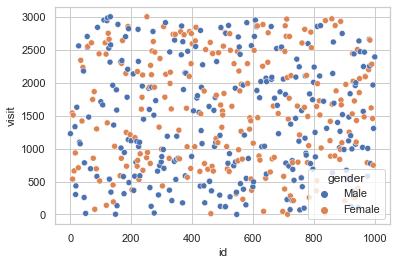

In [55]:
sns.set(style='whitegrid')
 
sns.scatterplot(x="id",y="visit",hue="gender",data=df)

#### Histogram

<AxesSubplot:xlabel='visit', ylabel='Count'>

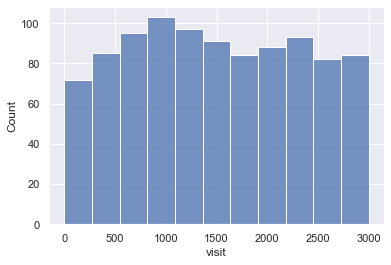

In [60]:
sns.set(style="darkgrid")
sns.histplot(data=df, x="visit")

C:\Users\vasan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='visit', ylabel='Density'>

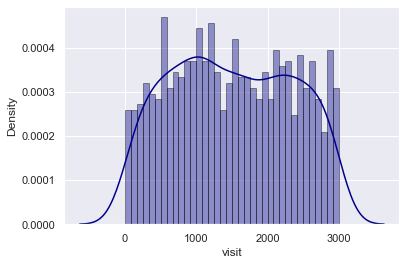

In [61]:
sns.distplot(df['visit'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'})